## 데이터 시각화
### 복습: 분포 (distribution)
- 히스토그램(histogram), 상자수염 도표(box-and-whisker plot)

### matplotlib 소개
- 소개
- DataFrame.groupby()
- 누적막대그래프 (stacked bar chart)

### seaborn 소개
- 소개
- sns.countplot()
- sns.boxplot()

### 질문하기: 순서/정렬/순위(order/sort/rank)
- 사람들은 스마트 기기에서 어떤 앱을 자주 사용하는가?
- pd.concat(), DataFrame.astype()

**패널의 가중치는 고려하지 않고 실습을 진행합니다.

In [2]:
from pandas import Series, DataFrame 
import pandas as pd
import numpy as np

pd.__version__

'1.0.5'

In [3]:
url = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p19_mediapanel.csv"

data = pd.read_csv(url, encoding = 'utf-8')
data.head()

,pid,hid,area,area_siz,hhld_siz,fly_typ,gender,byear,age_gr,age,...,news_med1,news_med2,news_med3,news_plat1,news_plat2,news_plat3,channel,shop,shop_dev,shop_pay
0,10001,100,1,1,3,3,1,1967,6,52,...,3,4,,3,2,,1,1,1,2
1,10002,100,1,1,3,3,2,1972,5,47,...,3,4,,3,2,,3,1,1,2
2,20001,200,1,1,3,3,1,1965,6,54,...,4,,,3,,,7,,,
3,30001,300,8,1,3,3,1,1971,5,48,...,3,,,3,,,1,,,
4,30002,300,8,1,3,3,2,1974,5,45,...,,,,,,,1,1,3,1


### 복습: 분포(distribution)
1. 온라인 디지털 콘텐츠를 얼마나 구매하는가?
2. 온라인 디지털 콘텐츠 지출금액의 분포는 어떠한가? 
3. 온라인 디지털 콘텐츠를 구매하는 사람들은 누구인가?

<table>
<thead>
<tr>
<td width="82">
<p>Original</p>
</td>
<td width="83">
<p>Cleaned</p>
</td>
<td>
<p>[방송통신 서비스 가입 및 지출] 온라인 디지털 콘텐츠 지출</p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td width="82">
<p>p__c05001</p>
</td>
<td width="83">
<p><strong>c01</strong></p>
</td>
<td>
<p>월평균 지출금액 - 온라인 뉴스/잡지/E-book(웹툰/웹소설 포함)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05002</p>
</td>
<td width="83">
<p><strong>c01_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - 온라인 뉴스/잡지/E-book(웹툰/웹소설 포함)(리코드)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05003</p>
</td>
<td width="83">
<p><strong>c02</strong></p>
</td>
<td>
<p>월평균 지출금액 - 동영상/영화</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05004</p>
</td>
<td width="83">
<p><strong>c02_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - 동영상/영화(리코드)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05005</p>
</td>
<td width="83">
<p><strong>c03</strong></p>
</td>
<td>
<p>월평균 지출금액 - TV 방송 프로그램</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05006</p>
</td>
<td width="83">
<p><strong>c03_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - TV 방송 프로그램(리코드)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05007</p>
</td>
<td width="83">
<p><strong>c04</strong></p>
</td>
<td>
<p>월평균 지출금액 - 음악</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05008</p>
</td>
<td width="83">
<p><strong>c04_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - 음악(리코드)</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05009</p>
</td>
<td width="83">
<p><strong>c05</strong></p>
</td>
<td>
<p>월평균 지출금액 - 게임</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__c05010</p>
</td>
<td width="83">
<p><strong>c05_gr</strong></p>
</td>
<td>
<p>월평균 지출금액 - 게임(리코드)</p>
</td>
</tr>
</tbody>
</table>

리코드: (1) 5천원 미만 (2) 5천원 - 1만원 미만 (3) 1만원 - 1만 5천원 미만 (4) 1만 5천원 - 2만원 미만 (5) 2만원 - 2만 5천원 미만 (6) 2만 5천원 - 3만원 미만 (7) 3만원 - 3만 5천원 미만 (8) 3만 5천원 이상 (9999) 모름/ 무응답

In [4]:
purchase = pd.concat([data.iloc[:, [0, 3, 6, 8, 9]], 
                      data.iloc[:,19:29].apply(lambda x: pd.to_numeric(x, errors = 'coerce').replace(0,np.nan))], 
                     axis = 1)
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pid       10864 non-null  int64  
 1   area_siz  10864 non-null  int64  
 2   gender    10864 non-null  int64  
 3   age_gr    10864 non-null  int64  
 4   age       10864 non-null  int64  
 5   c01       121 non-null    float64
 6   c01_gr    1647 non-null   float64
 7   c02       258 non-null    float64
 8   c02_gr    2038 non-null   float64
 9   c03       257 non-null    float64
 10  c03_gr    1275 non-null   float64
 11  c04       622 non-null    float64
 12  c04_gr    1833 non-null   float64
 13  c05       203 non-null    float64
 14  c05_gr    1550 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 1.2 MB


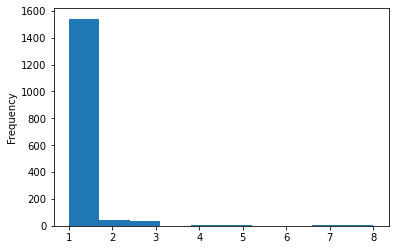

In [5]:
purchase['c01_gr'].plot.hist()

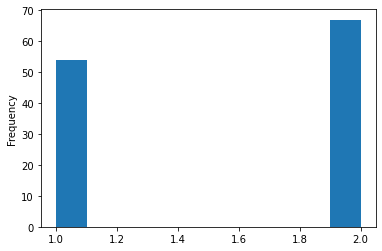

In [6]:
purchase[purchase['c01'].notna()]['gender'].plot.hist() # boolean indexing

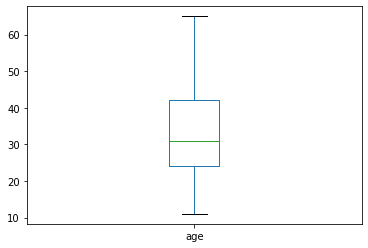

In [7]:
purchase[purchase['c01'].notna()]['age'].plot.box()

COVID-19 사태로 사람들이 집에 있는 시간이 늘어나면서 유튜브 트래픽은 급증했지만, 광고주들이 광고비 지출을 줄이면서 유튜버들의 광고수익은 오히려 줄었다고 합니다. 미디어 산업은 광고에 크게 의존해 왔지만 그 한계가 뚜렷하게 드러나고 있으며, 소비자 개인은 콘텐츠에 쉽게 돈을 지출하지(구독, 개별 구매, 후원 등) 않습니다. 앞으로 산업의 변화를 주시하면서 자신의 위치를 고민해 볼 필요가 있겠습니다.

As YouTube Traffic Soars, YouTubers Say Pay Is Plummeting
Advertising rates on the platform have dropped significantly during the coronavirus pandemic

“Everyone is pausing their campaigns on YouTube.”

https://onezero.medium.com/as-youtube-traffic-soars-youtubers-say-pay-is-plummeting-30dc1ba444db

### Matplotlib 소개

Pandas의 기본 기능에서 벗어나 시각화 패키지를 활용해 봅시다. 더 편리하고 다양한 시각화 옵션들을 제공합니다. 그래픽 유저 인터페이스가 아닌지라 처음에는 헷갈릴 수 있지만, 익숙해지면 데이터 분석과 동시에 빠르게 시각화를 만들어낼 수 있는 도구가 됩니다.

- Matplotlib 소개: https://matplotlib.org/3.2.1/index.html
- Seaborn 소개: https://seaborn.pydata.org/introduction.html

Matplotlib은 자유도가 굉장히 높은 도구이기 때문에 수업에서는 기본 사용 방법만 소개합니다. Seaborn은 matplotlib에 기반한 시각화 라이브러리로 다양한 그래프 옵션을 제공합니다.
- 갤러리: https://matplotlib.org/3.2.1/gallery/index.html

가장 먼저 matplotlib과 seaborn의 최신 버전을 설치합니다. 설치가 성공했으면 두 번 실행할 필요는 없으며, Google colab은 이미 최신 버전으로 설치되어 있으므로 굳이 설치할 필요가 없습니다.

In [ ]:
# Matplotlib version update

!pip install matplotlib

In [ ]:
# seaborn version update

!pip install seaborn

In [8]:
import matplotlib
import matplotlib.pyplot as plt # == from matplotlib import pyplot as plt
import seaborn as sns

# 그래프의 결과를 출력할 것
%matplotlib inline 

print(matplotlib.__version__) 
print(sns.__version__)

3.2.2
0.10.1


Matplotlib은 figure, axes, axis로 이루어져 있습니다. Figure는 전체 차트이며, 그 안에 여러 axes, 즉 그래프를 그리기 위한 공간을 가지고 있을 수 있습니다. Axis는 축입니다. 그림으로 살펴봅시다.

<img src='https://wikidocs.net/images/page/14604/4-5.png' width='500'/>

Figure를 구성하는 세부 요소는 다음과 같습니다.

<img src='https://matplotlib.org/_images/anatomy.png' width='600'/>

https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

Matplotlib에서 plt는 MATLAB이라는 프로그램 스타일의 그래프를 그릴 수 있게 돕는 인터페이스입니다. Matplotlib는 크게 __pyplot API__와 __object-oriented API__ 두 가지의 사용 패턴을 소개하는데, 수업에서는 주로 후자를 다룹니다.

https://matplotlib.org/3.2.1/api/index.html

Figure와 axes의 역할을 예시를 통해 알아봅시다.

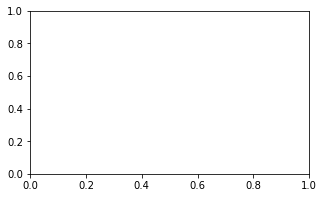

In [9]:
fig, ax = plt.subplots(figsize = (5, 3))  

plt.subplots()으로 figure와 axes 객체를 만들었습니다. Axes에 아무것도 없기 때문에 빈 화면만 나타납니다. Plt.subplots에서 figsize는 인치(inch)입니다.

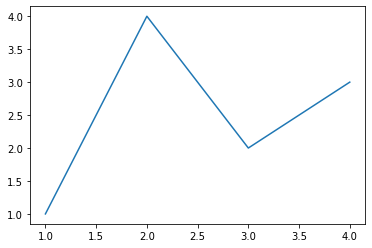

In [10]:
fig, ax = plt.subplots()  
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) 

Axes의 다른 구성 요소들을 건드려 봅시다. #1에서처럼 여러 함수를 쓸 수도, #2에서처럼 axes.set의 여러 매개변수로 수정/추가할 수 있습니다.

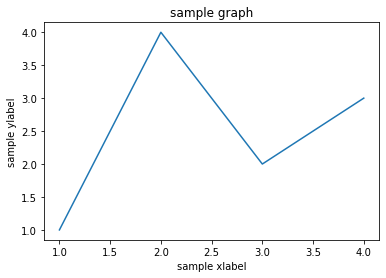

In [11]:
# 1
fig, ax = plt.subplots()  
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) 

ax.set_title("sample graph")
ax.set_xlabel("sample xlabel")
ax.set_ylabel("sample ylabel")

plt.show() # 그래프만 보여주기

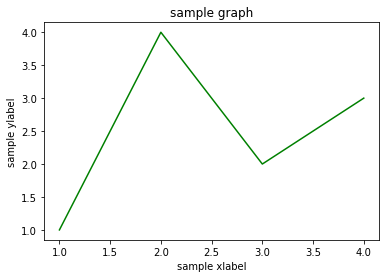

In [12]:
# 2
fig, ax = plt.subplots()  
ax.plot([1, 2, 3, 4], [1, 4, 2, 3], 
        color = 'green') 

ax.set(title = "sample graph", 
       xlabel = "sample xlabel",
      ylabel = "sample ylabel")

plt.show()

하나의 화면에 여러 개의 그래프를 그릴 수 있습니다.

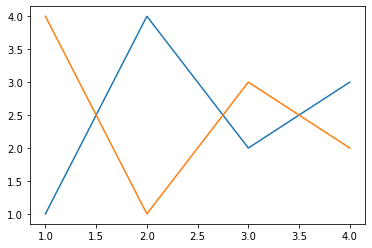

In [13]:
fig, ax = plt.subplots()  
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) 
ax.plot([1, 2, 3, 4], [4, 1, 3, 2]) 

plt.show()

하나의 figure에 여러 개의 axes를 그려 축을 비롯한 여러 구성요소들을 따로 가져갈 수 있습니다.

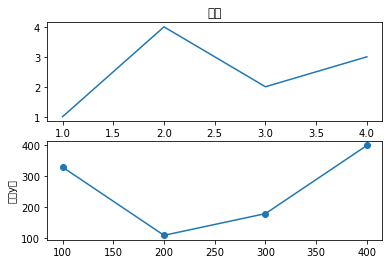

In [15]:
fig, axs = plt.subplots(nrows = 2, ncols = 1)
axs[0].plot([1, 2, 3, 4], [1, 4, 2, 3]) 
axs[1].plot([100, 200, 300, 400], [330, 110, 180, 400], marker = 'o') 

axs[0].set_title("샘플") # 한글 가능한 폰트로 바꾸어줄 필요 있음
axs[1].set_ylabel("샘플y축")

plt.show()

위 코드에서 경고의 원인은 한국어를 지원하지 않는 폰트입니다. Matplotlib의 기본 폰트를 한국어를 지원하는 폰트로 바꾸어 줄 필요가 있습니다. 복사/붙여넣기로 사용하시면 됩니다. 맥, 윈도우, 리눅스 운영체제에서 기능하는 코드입니다.

colab에서 한번에 되지 않는다면 런타임 다시 시작 - 기존의 패키지 import 모두 실행 - 다시 하단의 셀 실행 순서로 작업해 보세요.

In [16]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows': 
    path = 'c:\Windows\Fonts\malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == "Linux":
    !apt -qq -y install fonts-nanum
    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = font_manager.FontProperties(fname=fontpath, size=9)
    rc('font', family='NanumBarunGothic') 
    font_manager._rebuild()
else:
    print("unknown system")

지금까지 해 온 것처럼 DataFrame 기반으로 그래프를 그려 넣을 수 있습니다.

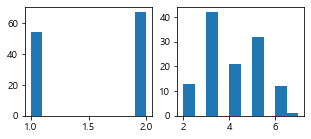

In [17]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 2))
axs[0].hist(purchase[purchase['c01'].notna()]['gender']) 
axs[1].hist(purchase[purchase['c01'].notna()]['age_gr'])

plt.show()

Axes 객체를 이용해서 다음과 같은 기본 그래프를 비롯해서 다양한 그래프를 그릴 수 있습니다. 6주차에는 이 중 bar(수직막대그래프)와 barh(수평막대그래프)만 사용합니다.


공식문서: https://matplotlib.org/api/axes_api.html

<div class="section" id="basic">
<h3>Basic</h3>
<table border="1" class="longtable docutils align-default">
<colgroup>
<col width="10%" />
<col width="90%" />
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal"  title="matplotlib.axes.Axes.plot"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.plot</span></code></a></td>
<td>Plot y versus x as lines and/or markers.</td>
</tr>
<tr class="row-even"><td><a class="reference internal"  title="matplotlib.axes.Axes.errorbar"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.errorbar</span></code></a></td>
<td>Plot y versus x as lines and/or markers with attached errorbars.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal"  title="matplotlib.axes.Axes.scatter"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.scatter</span></code></a></td>
<td>A scatter plot of <em>y</em> vs.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" title="matplotlib.axes.Axes.plot_date"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.plot_date</span></code></a></td>
<td>Plot data that contains dates.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal"  title="matplotlib.axes.Axes.step"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.step</span></code></a></td>
<td>Make a step plot.</td>
</tr>
<tr class="row-even"><td><a class="reference internal"  title="matplotlib.axes.Axes.loglog"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.loglog</span></code></a></td>
<td>Make a plot with log scaling on both the x and y axis.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal"  title="matplotlib.axes.Axes.semilogx"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.semilogx</span></code></a></td>
<td>Make a plot with log scaling on the x axis.</td>
</tr>
<tr class="row-even"><td><a class="reference internal"  title="matplotlib.axes.Axes.semilogy"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.semilogy</span></code></a></td>
<td>Make a plot with log scaling on the y axis.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" title="matplotlib.axes.Axes.fill_between"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.fill_between</span></code></a></td>
<td>Fill the area between two horizontal curves.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" title="matplotlib.axes.Axes.fill_betweenx"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.fill_betweenx</span></code></a></td>
<td>Fill the area between two vertical curves.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" title="matplotlib.axes.Axes.bar"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.bar</span></code></a></td>
<td>Make a bar plot.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" title="matplotlib.axes.Axes.barh"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.barh</span></code></a></td>
<td>Make a horizontal bar plot.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal"  title="matplotlib.axes.Axes.stem"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.stem</span></code></a></td>
<td>Create a stem plot.</td>
</tr>
<tr class="row-even"><td><a class="reference internal"  title="matplotlib.axes.Axes.eventplot"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.eventplot</span></code></a></td>
<td>Plot identical parallel lines at the given positions.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" title="matplotlib.axes.Axes.pie"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.pie</span></code></a></td>
<td>Plot a pie chart.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" title="matplotlib.axes.Axes.stackplot"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.stackplot</span></code></a></td>
<td>Draw a stacked area plot.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal"  title="matplotlib.axes.Axes.broken_barh"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.broken_barh</span></code></a></td>
<td>Plot a horizontal sequence of rectangles.</td>
</tr>
<tr class="row-even"><td><a class="reference internal"  title="matplotlib.axes.Axes.vlines"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.vlines</span></code></a></td>
<td>Plot vertical lines.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal"  title="matplotlib.axes.Axes.hlines"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.hlines</span></code></a></td>
<td>Plot horizontal lines at each <em>y</em> from <em>xmin</em> to <em>xmax</em>.</td>
</tr>
<tr class="row-even"><td><a class="reference internal"  title="matplotlib.axes.Axes.fill"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Axes.fill</span></code></a></td>
<td>Plot filled polygons.</td>
</tr>
</tbody>
</table>
</div>

하나의 figure에 필요하다면 여러 그래프(axes)를 그릴 수 있다는 점을 확인했습니다. 이제는 질문에 따라 여러 그래프를 그려봅시다.그 전에 groupby를 알고 넘어가야 합니다.

### groupby

특정 열을 중심으로(보통 범주형) 데이터를 묶어서 통계량 등을 살펴볼 수 있습니다. 

groupby()에서 멈추는 경우에는 groupby object만 리턴할 뿐 어떤 결과도 볼 수 없으며, 데이터를 그룹으로 묶은 후에 __어떤 작업을 할지 지정__해 주어야 합니다. 자주 쓰는 함수는 아래와 같습니다.

<table class="colwidths-given table">
<colgroup>
<col style="width: 20%" />
<col style="width: 80%" />
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Function</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mean()</span></code></p></td>
<td><p>Compute mean of groups</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">sum()</span></code></p></td>
<td><p>Compute sum of group values</p></td>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">count()</span></code></p></td>
<td><p>Compute count of group</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">describe()</span></code></p></td>
<td><p>Generates descriptive statistics</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">min()</span></code></p></td>
<td><p>Compute min of group values</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">max()</span></code></p></td>
<td><p>Compute max of group values</p></td>
</tr>
</tbody>
</table>

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [18]:
purchase.describe()

,pid,area_siz,gender,age_gr,age,c01,c01_gr,c02,c02_gr,c03,c03_gr,c04,c04_gr,c05,c05_gr
count,1.086400e+04,10864.000000,10864.000000,10864.000000,10864.000000,121.000000,1647.000000,258.000000,2038.000000,257.000000,1275.000000,622.000000,1833.000000,203.000000,1550.000000
mean,5.003951e+07,1.094532,1.541053,5.196705,47.126289,12.644628,1.149970,9.736434,1.200196,11.638132,1.402353,7.778135,1.414075,13.650246,1.280000
std,3.767155e+07,0.292581,0.498335,1.985370,20.679911,15.626292,0.713503,14.885827,0.693019,9.381945,1.091063,5.472134,0.776538,16.651074,1.011388
min,1.000100e+04,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.640250e+07,1.000000,1.000000,4.000000,30.000000,5.000000,1.000000,5.000000,1.000000,6.000000,1.000000,5.000000,1.000000,5.000000,1.000000
50%,5.170000e+07,1.000000,2.000000,5.000000,49.000000,10.000000,1.000000,9.000000,1.000000,10.000000,1.000000,8.000000,1.000000,10.000000,1.000000
75%,6.890000e+07,1.000000,2.000000,7.000000,62.000000,13.000000,1.000000,10.000000,1.000000,12.000000,1.000000,10.000000,2.000000,11.500000,1.000000
max,1.183300e+08,2.000000,2.000000,8.000000,104.000000,100.000000,8.000000,200.000000,8.000000,65.000000,8.000000,80.000000,8.000000,102.000000,8.000000


In [19]:
purchase.groupby('age_gr').describe()

pid                                                                 \
         count          mean           std       min          25%         50%   
age_gr                                                                          
1        214.0  6.544164e+07  4.337654e+07  100003.0  20385003.25  63050003.5   
2       1194.0  4.715217e+07  3.819050e+07   30003.0  14260003.25  29090004.0   
3       1225.0  4.769425e+07  3.807541e+07  120003.0  15160004.00  28620004.0   
4       1028.0  5.668883e+07  3.980450e+07  290003.0  20150003.00  57125002.0   
5       1980.0  4.799603e+07  3.935002e+07   10002.0  13312502.00  29820002.0   
6       2107.0  4.872641e+07  3.830108e+07   10001.0  14970001.50  40160001.0   
7       1402.0  5.311188e+07  3.642483e+07   80001.0  19907502.00  54860001.5   
8       1714.0  4.927764e+07  3.170699e+07  130001.0  20485001.75  54845001.5   

                                  area_siz            ...   c05        c05_gr  \
                 75%          max    count      mean  ...   75%    max  count   
age_gr                                                ...                       
1       1.094925e+08  118140004.0    214.0  1.093458  ...  15.0   15.0   32.0   
2       6.876251e+07  118240005.0   1194.0  1.077889  ...  10.5   30.0  262.0   
3       7.012000e+07  118300001.0   1225.0  1.053878  ...  15.0  100.0  335.0   
4       1.024875e+08  118290002.0   1028.0  1.056420  ...  10.0  100.0  252.0   
5       7.111000e+07  118240002.0   1980.0  1.059091  ...  15.0  102.0  325.0   
6       7.027500e+07  118270001.0   2107.0  1.057902  ...  10.0   15.0  239.0   
7       6.821000e+07  118280002.0   1402.0  1.139800  ...  10.0   10.0   87.0   
8       6.501750e+07  118330001.0   1714.0  1.207118  ...   NaN    NaN   18.0   

                                                     
            mean       std  min  25%  50%  75%  max  
age_gr                                               
1       1.093750  0.530330  1.0  1.0  1.0  1.0  4.0  
2       1.187023  0.747501  1.0  1.0  1.0  1.0  7.0  
3       1.543284  1.430132  1.0  1.0  1.0  1.0  8.0  
4       1.440476  1.287555  1.0  1.0  1.0  1.0  8.0  
5       1.218462  0.870450  1.0  1.0  1.0  1.0  8.0  
6       1.058577  0.325266  1.0  1.0  1.0  1.0  4.0  
7       1.045977  0.301471  1.0  1.0  1.0  1.0  3.0  
8       1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  

[8 rows x 112 columns]

In [20]:
purchase.groupby('age_gr').describe().loc[:,('c05', 'mean')] # Hierarchical indexing

age_gr
1    15.000000
2    10.000000
3    15.410256
4    14.400000
5    13.085714
6     8.600000
7    10.000000
8          NaN
Name: (c05, mean), dtype: float64

In [21]:
purchase.groupby('age_gr').mean().loc[:,'c05']

age_gr
1    15.000000
2    10.000000
3    15.410256
4    14.400000
5    13.085714
6     8.600000
7    10.000000
8          NaN
Name: c05, dtype: float64

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>

DataFrame 'purchase'를 지역구분(area_siz)에 따라 묶고, 시와 군에 각각 몇 명이 사는지 살펴보세요.

<table>
<thead>
<tr>
<td width="91">
<p>Original</p>
</td>
<td width="97">
<p>Cleaned</p>
</td>
<td width="210">
<p>Description</p>
</td>
<td>
<p>Detail</p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td width="91">
<p>pid</p>
</td>
<td width="97">
<p><strong>pid</strong></p>
</td>
<td width="210">
<p>[개인정보] 개인 통합 ID</p>
</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="91">
<p>p__area_siz</p>
</td>
<td width="97">
<p><strong>area_siz</strong></p>
</td>
<td width="210">
<p>[가구정보] 지역구분</p>
</td>
<td>
<p>① 시부 ② 군부</p>
</td>
</tr>
<tr>
    </tbody>

### 누적막대그래프(stacked bar plot)

누적막대그래프는 빈도를 누적(stacked)하여 보여주는 막대그래프입니다. 여러 빈도의 분포를 비교할 수 있다는 것이 장점입니다. 

각 온라인 디지털 콘텐츠를 구매하는 사람들을 성별에 따라 보려고 합니다.

In [22]:
purchase.groupby('gender').count()

,pid,area_siz,age_gr,age,c01,c01_gr,c02,c02_gr,c03,c03_gr,c04,c04_gr,c05,c05_gr
gender,,,,,,,,,,,,,,
1,4986,4986,4986,4986,54,841,126,1010,126,642,244,821,155,883
2,5878,5878,5878,5878,67,806,132,1028,131,633,378,1012,48,667


In [23]:
purchase.groupby('gender').count().loc[1,['c01', 'c02', 'c03', 'c04', 'c05']]

c01     54
c02    126
c03    126
c04    244
c05    155
Name: 1, dtype: int64

In [24]:
purchase.groupby('gender').count().loc[2,['c01', 'c02', 'c03', 'c04', 'c05']]

c01     67
c02    132
c03    131
c04    378
c05     48
Name: 2, dtype: int64

누적막대그래프(stacked bar plot)는 matplotlib에서 두 개의 수평막대그래프를 이어서 그립니다.

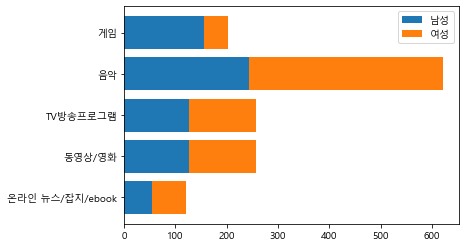

In [25]:
fig, ax = plt.subplots()

korlabels = ['온라인 뉴스/잡지/ebook', '동영상/영화', 'TV방송프로그램', '음악', '게임']
male_count = purchase.groupby('gender').count().loc[1,['c01', 'c02', 'c03', 'c04', 'c05']]
female_count = purchase.groupby('gender').count().loc[2,['c01', 'c02', 'c03', 'c04', 'c05']]

ax.barh(korlabels, 
       male_count, 
       label='남성')

ax.barh(korlabels, 
       female_count, 
       left = male_count,
       label='여성')

ax.legend() # 범례

fig.savefig('example.png') # 코드가 있는 폴더에 그림으로 저장

plt.show()

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>

- 수직막대그래프를 수평막대그래프로 바꾸어 그려 보세요. 
- 그래프에 적절한 제목(title)을 붙이세요.
- x축의 가시성을 높일 방안을 고민해 보세요.

https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/bar_stacked.html

In [ ]:
help(ax.bar)

### Seaborn 소개

Seaborn은 matplotlib에 의존하는 라이브러리로, 여러 데이터 간 기술통계 및 관계를 탐색하기 위한 다양한 차트를 지원합니다. 6주차에는 범주형 데이터를 중심으로 가능한 그래프를 먼저 살펴봅니다.

https://seaborn.pydata.org/introduction.html

https://seaborn.pydata.org/examples/index.html

지난시간의 온라인 뉴스/잡지/E-book(웹툰/웹소설 포함)의 예제로 seaborn의 여러 차트들을 살펴봅시다. 히스토그램은 countplot으로 그릴 수 있습니다.

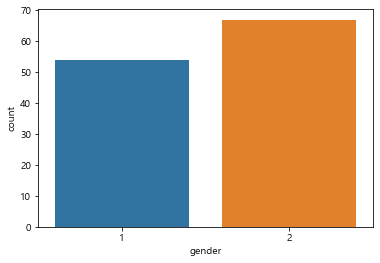

In [26]:
sns.countplot(x="gender", data=purchase[purchase['c01'].notna()])

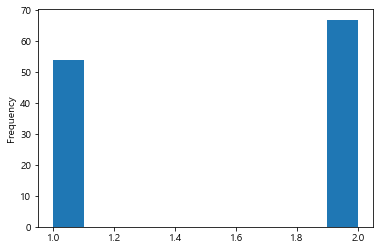

In [27]:
purchase[purchase['c01'].notna()]['gender'].plot.hist()

Seaborn에서 지원하는 범주형 변수 관련 차트는 아래와 같습니다. 함수 'catplot'으로 아래 차트를 모두 그릴 수 있지만, 우선 개별 차트(countplot, boxplot)위주로 살펴봅니다.

<table>
<colgroup>
<col width="10%" />
<col width="90%" />
</colgroup>
<thead>
<tr>
<td>
<p>Plot</p>
</td>
<td>
<p>Seaborn:plotting with categorical data: example</p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td>
<p>stripplot</p>
</td>
<td>
<p><img src='https://seaborn.pydata.org/_images/seaborn-stripplot-2.png' /></p>
</td>
</tr>
<tr>
<td>
<p>swarmplot</p>
</td>
<td>
<p><img src='https://seaborn.pydata.org/_images/seaborn-swarmplot-2.png' /></p>
</td>
</tr>
<tr>
<td>
<p>boxplot</p>
</td>
<td>
<p><img src='https://seaborn.pydata.org/_images/seaborn-boxplot-2.png' /></p>
</td>
</tr>
<tr>
<td>
<p>violinplot</p>
</td>
<td>
<p><img src='https://seaborn.pydata.org/_images/seaborn-violinplot-2.png' /></p>
</td>
</tr>
<tr>
<td>
<p>boxenplot</p>
</td>
<td>
<p><img src='https://seaborn.pydata.org/_images/seaborn-boxenplot-2.png' /></p>
</td>
</tr>
<tr>
<td>
<p>pointplot</p>
</td>
<td>
<p><img src='https://seaborn.pydata.org/_images/seaborn-pointplot-2.png' /></p>
</td>
</tr>
<tr>
<td>
<p>barplot</p>
</td>
<td>
<p><img src='https://seaborn.pydata.org/_images/seaborn-barplot-3.png' /></p>
</td>
</tr>
<tr>
<td>
<p>countplot</p>
</td>
<td>
<p><img src='https://seaborn.pydata.org/_images/seaborn-countplot-2.png' /></p>
</td>
</tr>
</tbody>
</table>

In [ ]:
help(sns.countplot)

매개변수 중 x, y, hue를 중심으로 사용하게 됩니다. countplot은 y값이 빈도이므로 x와 hue만 살펴봅시다.

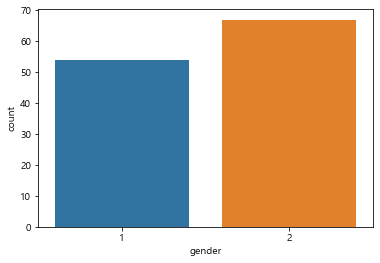

In [28]:
sns.countplot(x = 'gender', 
            data = purchase[purchase['c01'].notna()])

매개변수 hue는 x로 지정된 변수를 hue로 지정된 변수에 따라 나누어 색깔로 구분합니다. 두 가지 범주형 변수를 기준으로 데이터의 분포를 살펴볼 수 있으며, 오른쪽에 범례도 확인할 수 있습니다.

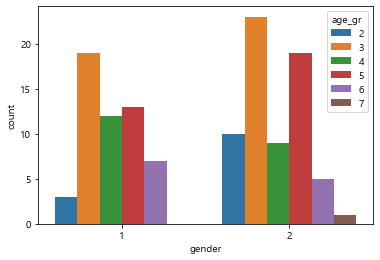

In [29]:
sns.countplot(x = 'gender', 
            hue = 'age_gr',
            data = purchase[purchase['c01'].notna()])

Matplotlib의 axes로 지정해서 함께 사용하는 예제입니다.

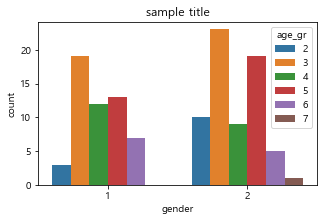

In [30]:
fig, ax = plt.subplots(figsize = (5, 3))

sns.countplot(x = 'gender', 
            hue = 'age_gr',
            data = purchase[purchase['c01'].notna()],
            ax = ax)

ax.set(title = "sample title")

plt.show()

Seaborn의 장점은 다양한 배경과 색상을 비롯한 차트 스타일을 제공한다는 것입니다. 

sns.set()은 기본 스타일로 돌아오게 하는 함수이고, sns.set_style()과 set_context()로 다양한 스타일을 살펴볼 수 있습니다. 다만 모든 차트에 적용됩니다.

https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set

https://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style

https://seaborn.pydata.org/generated/seaborn.set_context.html#seaborn.set_context


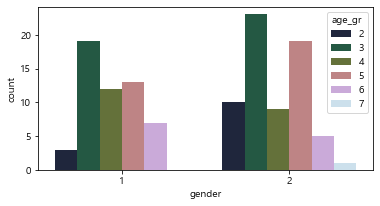

In [31]:
fig, ax = plt.subplots(figsize = (6, 3))

# sns.set()
# sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
# sns.set_context("paper") # paper, notebook, talk, poster
# sns.set_context("paper", font_scale=1.5)

sns.countplot(x = 'gender', 
            hue = 'age_gr',
            data = purchase[purchase['c01'].notna()],
              ax = ax,
           palette = "cubehelix")

# sns.set_style("white")
# sns.set_context("notebook")

plt.show()

컬러 팔레트도 굉장히 많습니다.

https://seaborn.pydata.org/tutorial/color_palettes.html

<p><img src='https://betterfigures.files.wordpress.com/2015/06/categorical.png?w=500&h=250' width='350'/>

box plot에서 x는 구분해 보고 싶은 범주형 변수, y로는 분포를 나타낼 변수(column)가 필요합니다.

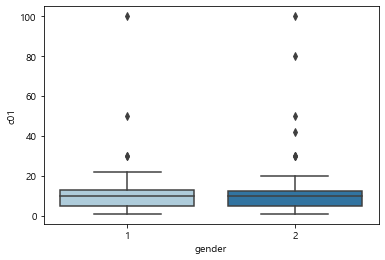

In [32]:
sns.boxplot(x = 'gender', 
            y = "c01",
            data = purchase[purchase['c01'].notna()], 
           palette = "Paired")

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>

- 음악 콘텐츠 소비자의 box plot을 성별과 지역구분에 따라 그려보세요. 
- 마음에 드는 컬러 팔레트로 색깔을 바꾸어 그리세요.
- 제목(title)을 붙이세요.

## 막대그래프

### 질문하기: 순서/정렬/순위(order/sort/rank)
- 수직/수평 막대그래프 (vertical/horizontal bar plot): 통계치를 막대의 높이(수직) 또는 길이(수평)로 나타낸 도표로, 전자는 시간의 흐름을 표현하기 편리하며 후자는 라벨 표기에 장점이 있음

- 질문: 사람들은 스마트 기기에서 어떤 앱을 자주 사용하는가?

막대그래프를 그릴 때에는 분포와 다르게 정리한 값을 넣거나, 매개변수로 넣은 데이터에서 어떤 통계치로 요약할지 지정해 주어야 합니다.

In [33]:
purchase.loc[:,['c01', 'c02', 'c03', 'c04', 'c05']].mean()

c01    12.644628
c02     9.736434
c03    11.638132
c04     7.778135
c05    13.650246
dtype: float64

Seaborn의 barplot은 estimator로 필요한 통계치를 지정할 수 있으며 기본으로는 np.mean 평균을 구합니다. numpy에서 불러옵니다.

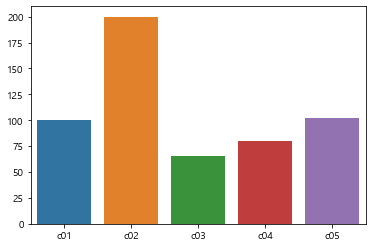

In [34]:
sns.barplot(data = purchase.loc[:,['c01', 'c02', 'c03', 'c04', 'c05']],
            estimator = np.max, # 최대값
            ci = None)

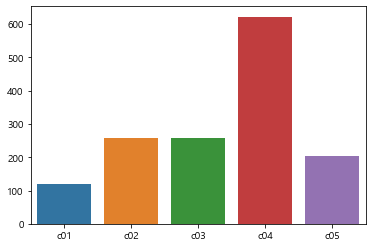

In [35]:
sns.barplot(data = purchase.loc[:,['c01', 'c02', 'c03', 'c04', 'c05']],
            estimator = len, # length -> count
            ci = None)

Matplotlib에서는 차트를 그리기 전 데이터를 미리 정리했습니다.

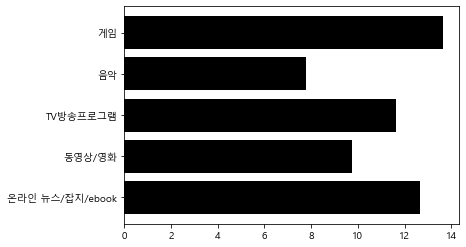

In [36]:
fig, ax = plt.subplots()

korlabels = ['온라인 뉴스/잡지/ebook', '동영상/영화', 'TV방송프로그램', '음악', '게임']
content_stat = purchase.loc[:,['c01', 'c02', 'c03', 'c04', 'c05']].mean()

ax.barh(korlabels, content_stat, color = 'black')

plt.show()

사람들이 자주 이용하는 스마트 기기 애플리케이션 1, 2, 3순위를 살펴봅시다.

p__d01001 p__d01002 p__d01003 __freq_app1 freq_app2 freq_app3__

[미디어 이용행태] 자주 이용하는 스마트 기기 애플리케이션 1, 2, 3순위

<table style="width: 340px;">
<thead>
<tr>
<td style="width: 64px;">
<p>범주</p>
</td>
<td style="width: 290px;">
<p>설명</p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td style="width: 64px;">
<p>1</p>
</td>
<td style="width: 290px;">
<p>책/만화(웹툰)</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>2</p>
</td>
<td style="width: 290px;">
<p>교육 (외국어, 인터넷 수능 등)</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>3</p>
</td>
<td style="width: 290px;">
<p>게임</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>4</p>
</td>
<td style="width: 290px;">
<p>지출관리/금융거래</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>5</p>
</td>
<td style="width: 290px;">
<p>쇼핑</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>6</p>
</td>
<td style="width: 290px;">
<p>생활정보/날씨 (건강관리 포함)</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>7</p>
</td>
<td style="width: 290px;">
<p>엔터테인먼트 (음악/방송/동영상/사진) (삭제됨)</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>8</p>
</td>
<td style="width: 290px;">
<p>내비게이션/지리/위치/교통정보</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>9</p>
</td>
<td style="width: 290px;">
<p>뉴스</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>10</p>
</td>
<td style="width: 290px;">
<p>소셜네트워킹(카카오스토리, 페이스북, 트위터 등)</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>11</p>
</td>
<td style="width: 290px;">
<p>인스턴트메신저(카카오톡, 마이피플 등)</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>12</p>
</td>
<td style="width: 290px;">
<p>스포츠</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>13</p>
</td>
<td style="width: 290px;">
<p>여행</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>14</p>
</td>
<td style="width: 290px;">
<p>유틸리티/도구/일정관리/배경화면</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>15</p>
</td>
<td style="width: 290px;">
<p>레퍼런스/참고자료</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>16</p>
</td>
<td style="width: 290px;">
<p>음악</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>17</p>
</td>
<td style="width: 290px;">
<p>방송/동영상</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>18</p>
</td>
<td style="width: 290px;">
<p>사진/카메라</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>19</p>
</td>
<td style="width: 290px;">
<p>포털애플리케이션(네이버, 다음, 네이트 등)</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>88</p>
</td>
<td style="width: 290px;">
<p>이용경험 없음</p>
</td>
</tr>
<tr>
<td style="width: 64px;">
<p>9999</p>
</td>
<td style="width: 290px;">
<p>모름/무응답</p>
</td>
</tr>
</tbody>
</table>

In [37]:
app = data.loc[:,['pid','age_gr','gender', 'freq_app1','freq_app2','freq_app3']]
app.head()

,pid,age_gr,gender,freq_app1,freq_app2,freq_app3
0,10001,6,1,11,8,6
1,10002,5,2,11,16,18
2,20001,6,1,12,8,11
3,30001,5,1,19,8,11
4,30002,5,2,17,19,11


In [38]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        10864 non-null  int64 
 1   age_gr     10864 non-null  int64 
 2   gender     10864 non-null  int64 
 3   freq_app1  10864 non-null  object
 4   freq_app2  10864 non-null  object
 5   freq_app3  10864 non-null  object
dtypes: int64(3), object(3)
memory usage: 509.4+ KB


In [39]:
app['freq_app1'].value_counts().sort_index()

      2327
1      331
10     301
11    3451
12      73
13      23
14      14
15       4
16     353
17     343
18     258
19    1386
2       75
3      607
4       78
5      278
6      226
8      318
9      418
Name: freq_app1, dtype: int64

앞서 DataFrame 'purchase'를 만들 때처럼 공백은 NaN으로 바꾸어 주고, 그 결과를 float에서 int로 저장했습니다.

In [40]:
app.iloc[:, 3:6] = app.iloc[:, 3:6].apply(lambda x: pd.to_numeric(x, errors = 'coerce').replace(0,np.nan))
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        10864 non-null  int64  
 1   age_gr     10864 non-null  int64  
 2   gender     10864 non-null  int64  
 3   freq_app1  8537 non-null   float64
 4   freq_app2  8356 non-null   float64
 5   freq_app3  7984 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 509.4 KB


1, 2, 3순위에 모두 응답한 사람만 골라내어 살펴봅시다. NaN으로 처리된 값은 __dropna__로 지울 수 있습니다.

In [42]:
help(DataFrame.dropna)

따로 기준 열(column) 등을 지정하지 않고 NaN이 보이는 모든 행을 지웁니다.

In [43]:
app.dropna(axis = 0) # row, default
# app.dropna(axis = 1) # column

,pid,age_gr,gender,freq_app1,freq_app2,freq_app3
0,10001,6,1,11.0,8.0,6.0
1,10002,5,2,11.0,16.0,18.0
2,20001,6,1,12.0,8.0,11.0
3,30001,5,1,19.0,8.0,11.0
4,30002,5,2,17.0,19.0,11.0
...,...,...,...,...,...,...
10850,118240004,2,1,3.0,16.0,19.0
10851,118240005,2,2,3.0,18.0,5.0
10858,118290001,4,2,5.0,18.0,16.0
10860,118300001,3,1,17.0,8.0,11.0


In [44]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        10864 non-null  int64  
 1   age_gr     10864 non-null  int64  
 2   gender     10864 non-null  int64  
 3   freq_app1  8537 non-null   float64
 4   freq_app2  8356 non-null   float64
 5   freq_app3  7984 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 509.4 KB


대부분의 경우에 DataFrame의 메서드는 결과를 덮어씌우지 않고 새로운 copy로 돌려줍니다. 덮어씌우고 싶다면 inplace를 이용합니다.

In [45]:
app.dropna(axis = 0, inplace = True)

In [46]:
app.head()

,pid,age_gr,gender,freq_app1,freq_app2,freq_app3
0,10001,6,1,11.0,8.0,6.0
1,10002,5,2,11.0,16.0,18.0
2,20001,6,1,12.0,8.0,11.0
3,30001,5,1,19.0,8.0,11.0
4,30002,5,2,17.0,19.0,11.0


Float이 아니라 integer로 바꾸어 작업합니다. Astype을 사용합니다.

In [47]:
app = app.astype('int64')
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7984 entries, 0 to 10862
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   pid        7984 non-null   int64
 1   age_gr     7984 non-null   int64
 2   gender     7984 non-null   int64
 3   freq_app1  7984 non-null   int64
 4   freq_app2  7984 non-null   int64
 5   freq_app3  7984 non-null   int64
dtypes: int64(6)
memory usage: 436.6 KB


사람들이 어떤 앱을 자주 이용하는지 가중치를 두고 점수를 매겨봅시다. 1순위에는 3점, 2순위에는 2점, 3순위에는 1점을 주어 합산할 수 있도록 순위당 각 앱별 빈도를 계산합니다.

In [48]:
app.freq_app1.value_counts().sort_index()

1      326
2       72
3      566
4       75
5      264
6      217
8      312
9      398
10     287
11    3138
12      71
13      23
14      12
15       4
16     335
17     326
18     224
19    1334
Name: freq_app1, dtype: int64

pd.concat은 주어진 DataFrame 또는 Series를 붙이는 함수이며, axis = 1일 때 열(column)을 기준으로 붙습니다.

In [49]:
apprank = pd.concat([app.freq_app1.value_counts().sort_index(),
                 app.freq_app2.value_counts().sort_index(),
                 app.freq_app3.value_counts().sort_index()],
                 axis = 1)

apprank

,freq_app1,freq_app2,freq_app3
1,326,203,237
2,72,72,57
3,566,509,563
4,75,108,107
5,264,294,351
6,217,319,488
8,312,381,480
9,398,657,722
10,287,616,481
11,3138,1508,1063


In [50]:
apprank['weighted_sum'] = 3*apprank['freq_app1'] + 2*apprank['freq_app1'] + 1*apprank['freq_app1']

Seaborn으로 그려봅시다. 요약통계가 아니므로 x에는 각 앱을 뜻하는 index를, y값은 weighted_sum을 바로 넣습니다. estimator는 필요하지 않습니다.

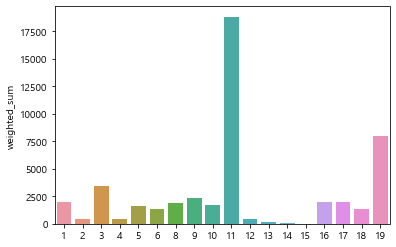

In [51]:
sns.barplot(x = apprank.index, y = 'weighted_sum', data = apprank,
            ci = None)

아마 순서대로 정렬하고 싶은 생각이 들 겁니다. 지금은 숫자 순서이지만, 값이 큰 순서대로 x축의 순서를 조정해서 order로 넣어주어야 합니다.

In [52]:
apprank['weighted_sum'].sort_values(ascending = False)

11    18828
19     8004
3      3396
9      2388
16     2010
1      1956
17     1956
8      1872
10     1722
5      1584
18     1344
6      1302
4       450
2       432
12      426
13      138
14       72
15       24
Name: weighted_sum, dtype: int64

In [53]:
apprank['weighted_sum'].sort_values(ascending = False).index

Int64Index([11, 19, 3, 9, 16, 1, 17, 8, 10, 5, 18, 6, 4, 2, 12, 13, 14, 15], dtype='int64')

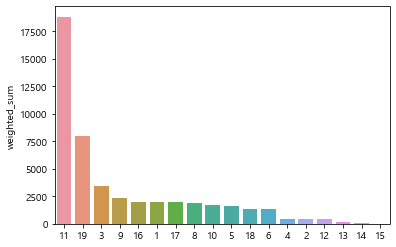

In [54]:
sns.barplot(x = apprank.index, y = 'weighted_sum', data = apprank,
            ci = None, order = apprank['weighted_sum'].sort_values(ascending = False).index)

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
위의 그래프를 수평막대그래프(orient)로 바꾸어 그려봅시다.

In [ ]:
help(sns.barplot)


#### 참고: 인코딩

인코딩이란 문자와 기호를 컴퓨터에서 표현하는 방법으로, 한글의 경우 CP949, EUC-KR, UTF-8 이 가장 많습니다. 인코딩이 다르면 데이터의 내용을 파악할 수 없기 때문에 읽고 쓸 때 주의해야 합니다.

인코딩을 명시하지 않은 경우에 읽어올 수 있는 것은 기본값인 utf-8로 이미 설정되어 있기 때문입니다.

In [57]:
test_url = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/test_cp949.csv"

test = pd.read_csv(test_url) # error
# test = pd.read_csv(test_url, encoding = 'cp949')

test.head()

In [ ]:
test.to_csv("test_url.csv", encoding = 'utf-8', index = None) # csv로 저장

In [ ]:
!ls # colab

In [ ]:
test2 = pd.read_csv("test_url.csv") # 같은 폴더에 있는 경우
test2.head()